#### Data 620 - Assignment 4<br>June 19, 2019<br>Team 2: <ul> <li>Anthony Munoz</li> <li>Katie Evers</li> <li>Juliann McEachern</li> <li>Mia Siracusa</li></ul>

<h1 align="center">“Datasets”</h1>

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1.  [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis):  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2.  [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat).
3. [Python code](https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html) to create dataset. 

What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an IPython notebook stored in your GitHub repository. You may work in a small group on this project. Due end of day Wednesday, 6/19.

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

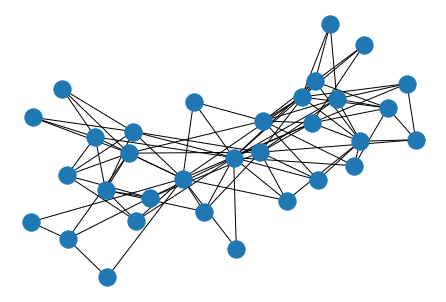

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import math
#from prettytable import PrettyTable

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))

nx.draw(G)
plt.show()


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


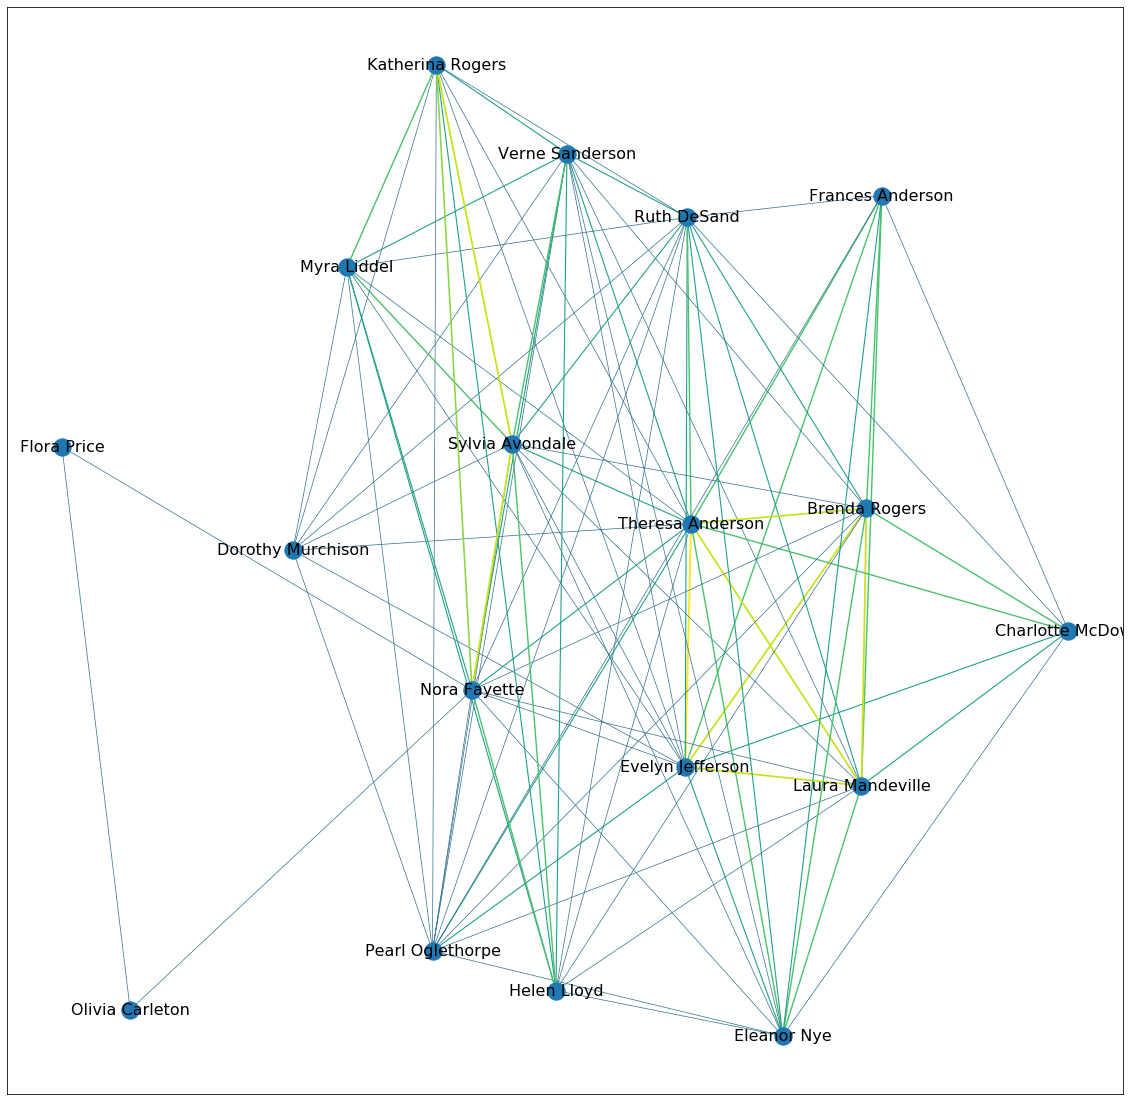

In [4]:
# Graph of women (with weighted interactions)
plt.figure(figsize=(20,20))
womnet = bipartite.weighted_projected_graph(G, women, ratio=False)
weights = [math.log(edata['weight']) for f,t,edata in womnet.edges(data=True)]
womplot = nx.draw_networkx(womnet,width=weights,edge_color=weights,font_size=16)

First step, we will trim the graph of free floaters like Flora and Olivia. They seem to belong to a separate group that is only connected to the others through Nora.

We will first plot the weight each woman has in relation to the others and remove the ones with the least connections.

(array([44.,  0.,  0., 49.,  0., 22.,  0., 15.,  1.,  8.]),
 array([0.        , 0.19459101, 0.38918203, 0.58377304, 0.77836406,
        0.97295507, 1.16754609, 1.3621371 , 1.55672812, 1.75131913,
        1.94591015]),
 <a list of 10 Patch objects>)

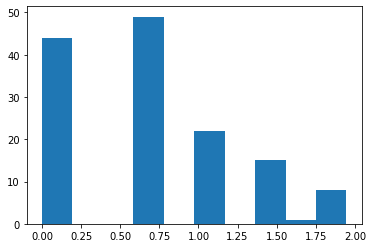

In [5]:
def trim_edges(G, weight=1):
    NewG = nx.Graph()
    for f,to,edata in G.edges(data=True):
        if edata['weight'] > weight:
            NewG.add_edge(f,to,edata)
    return NewG
plt.hist(weights)

Then, we will calculate the number of triangles for each node. The nodes (women) with the most triangles, are the ones of interest to us, because that signifies a lot of social ties.

In [6]:
nx.triangles(womnet)

{'Evelyn Jefferson': 122,
 'Laura Mandeville': 101,
 'Theresa Anderson': 122,
 'Brenda Rogers': 101,
 'Charlotte McDowd': 55,
 'Frances Anderson': 101,
 'Eleanor Nye': 101,
 'Pearl Oglethorpe': 112,
 'Ruth DeSand': 122,
 'Verne Sanderson': 122,
 'Myra Liddel': 112,
 'Katherina Rogers': 112,
 'Sylvia Avondale': 122,
 'Nora Fayette': 122,
 'Helen Lloyd': 122,
 'Dorothy Murchison': 112,
 'Olivia Carleton': 66,
 'Flora Price': 66}

What we can see from the above that Evelyn, Myra, Nora, Sylvia, Theresa and Verne are at the vertex of the most triangles. There appear to be three groups of triangles, ones below 100, ones above 100 and ones that are apporximately 100.



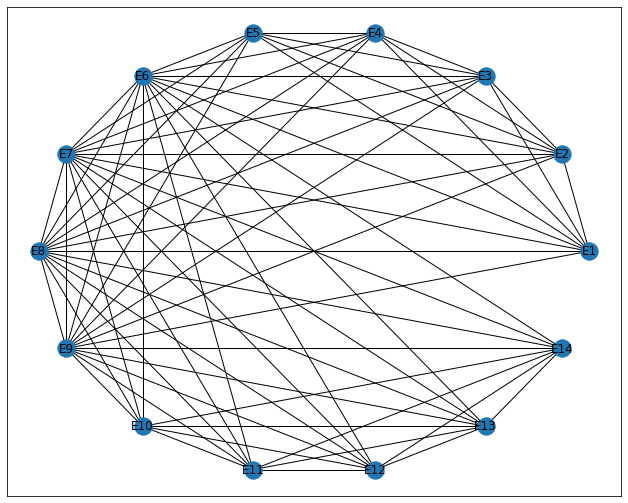

In [7]:
plt.figure(figsize=(11,9))
clubnet = bipartite.weighted_projected_graph(G, clubs, ratio=False)
clubplot = nx.draw_networkx(clubnet,pos=nx.shell_layout(clubnet))

In [8]:
nx.triangles(clubnet)


{'E1': 28,
 'E2': 28,
 'E3': 28,
 'E4': 28,
 'E5': 28,
 'E6': 53,
 'E7': 53,
 'E8': 53,
 'E9': 53,
 'E10': 28,
 'E11': 28,
 'E12': 28,
 'E13': 28,
 'E14': 28}

We can see that all of the events are pretty well connected, but E6, E7, E8, and E9 are the events or clubs attended by the most friends, or women that share connections. Next, we will create a function to create a centrality table to compare which node is truly the most central in the graph. This can be used for either the women graph or the club graph.

In [9]:
def CentralityTable(graph):
    degree = nx.degree(graph)
    degreecentral = nx.degree_centrality(graph)
    betweencentral = nx.betweenness_centrality(graph)
    closecentral = nx.closeness_centrality(graph)
    eigencentral = nx.eigenvector_centrality_numpy(graph)

    table = [[name,degree[name],round(degreecentral[name],3),round(betweencentral[name],3),round(closecentral[name],3),round(eigencentral[name],3)] for name in graph.nodes()]
    table = sorted(table,key = lambda x: -x[2])
    centraltable = PrettyTable(['Name','Degree','Degree Centrality','Betweenness','Closeness','Eigenvector'])
    for i in range(0, len(table)):
        centraltable.add_row(table[i])
    return centraltable

In [10]:
print(CentralityTable(womnet))

NameError: name 'PrettyTable' is not defined

In [ ]:
print(CentralityTable(clubnet))


Among the women, the closeness measures are all pretty high, so we can say that everyone in the group is relatively close. The betweeness measure, however, is low. This means that no one person is necessarily acting as a bridge between the groups.

The centrality measures are highest for Evelyn, Helen, Nora, Sylvia, Theresa, Ruth and Verne. This, as predicted previously, means they are the most connected in the group. On the low side, there is Flora, Olivia, and Charlotte. Flora and Olivia are of no surprise, but Charlotte is slightly surprising since she seems well connected. This could mean that she is close to a few people.

Since the eigenvector values are relatively low for everyone, we can say no one is near a central figure or that no matter how central the person, there were others equally as connected.